In [5]:
# Imports basics
import os
import numpy as np
import h5py
import json
#import setGPU
import sklearn
#import corner
import scipy
import time
from tqdm import tqdm 
#import utils #import *
import sys
import glob
#import models
#import losses
# Imports neural net tools
import itertools
import torch
import torch.nn as nn
from torch.autograd.variable import *
import torch.optim as optim
import torch.nn.functional as F
#from fast_soft_sort.pytorch_ops import soft_rank
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,  auc

from sklearn.preprocessing import OneHotEncoder
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
np.random.seed(42)


In [6]:
ipath = '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/'
vpath = '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/'

In [7]:
sorted(glob.glob(ipath+'*h5'))[:10]

['/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_0_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_100_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_101_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_102_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_103_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_104_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_105_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_106_train.h5',
 '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_107_train

In [5]:
import dataset_loader
import importlib
importlib.reload(dataset_loader)
data_train = dataset_loader.zpr_loader(ipath,maxfiles=10) 
data_val = dataset_loader.zpr_loader(vpath,maxfiles=10)

Reading files...
['/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_0_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_100_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_101_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_102_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_103_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_104_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_105_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_106_train.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/train/raw/merged_

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


self.data_features.shape (601210, 100, 13)
Reading files...
['/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_0_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_100_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_101_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_102_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_103_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_104_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_105_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/raw/merged_106_val.h5', '/work/tier3/jkrupa/zprlegacy/process/19May23_physicalpt_v2_with2018_v2/merged/val/ra

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.56it/s]


self.data_features.shape (150302, 100, 13)


## Pretraining Jet Matching

In [65]:
#First we have to generate the data set
#We must have 50% matched and 50% unmatched


In [282]:
loader = gen_matched_data(data_train, 2000)

In [281]:
#specify n the number of jet matchings to prepare, must be <= size of dataset
#
# It will make 1/2 correct matchings and 1/2 incorrect (equal probability to be any incorrect combination
#
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import torch


def gen_matched_data(data, n,*args):
    indices = torch.randperm(len(data))[:n]
    dt = data[indices]
    labels = dt[3]
    jets = dt[0]

    mask1 = torch.squeeze(torch.nonzero(torch.all(labels == torch.tensor([1., 0., 0., 0.]), dim=1)))
    mask2 = torch.squeeze(torch.nonzero(torch.all(labels == torch.tensor([0., 1., 0., 0.]), dim=1)))
    mask3 = torch.squeeze(torch.nonzero(torch.all(labels == torch.tensor([0., 0., 1., 0.]), dim=1)))
    mask4 = torch.squeeze(torch.nonzero(torch.all(labels == torch.tensor([0., 0., 0., 1.]), dim=1)))
    masks = [mask1,mask2,mask3,mask4]


    pre_train_jets = []
    truth = []
    for v in range(n):
        index = torch.randint(0, n, (1,)).item()
        cur_label = labels[index]
        cur_jet = jets[index]
        if v < n/2:
            #Get the same class of jets
            cur_mask = masks[torch.squeeze(torch.nonzero(cur_label)).item()]
            exclude_index = index
            num_elements = cur_mask.numel() - 1
            random_index = torch.randint(0, num_elements, (1,)).item()
            if random_index >= exclude_index:
                random_index += 1
            random_element = cur_mask[random_index]
            truth.append(1)
        else:
            #Get different classes of jets
            exclude_index = torch.squeeze(torch.nonzero(cur_label)).item()
            num_elements = 3
            random_index = torch.randint(0, num_elements, (1,)).item()
            if random_index >= exclude_index:
                random_index += 1
            cur_mask = masks[random_index]
            rand_mask_index= torch.randint(0, cur_mask.numel(), (1,)).item()
            random_element = cur_mask[rand_mask_index]
            truth.append(0)
        matched_jets = [jets[index], jets[random_element]]
        pre_train_jets.append(matched_jets)
    # Assuming you have a list of 5000 pairs of tensors
    pairs = pre_train_jets
    # Combine the tensors into a single tensor
    combined_matched_jets = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)
    truth = torch.tensor(truth)
    permutation = torch.randperm(n)

    combined_matched_jets = combined_matched_jets[permutation]
    truth = truth[permutation]

    loader = DataLoader(TensorDataset(combined_matched_jets,truth), *args)#,shuffle=(train_sampler is None),)
    return loader


In [22]:
import models
import transformers
model_t = models.Transformer(args,"transformer",_softmax,_sigmoid, args.sv)

ModuleNotFoundError: No module named 'transformers'

## Pretraining KNN Masking

In [6]:
from torch.utils.data import DataLoader
train_loader = DataLoader(data_train, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)
val_loader = DataLoader(data_val, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)

In [7]:
ex = data_train[0]

In [8]:
batched_dt = next(iter(train_loader))

In [13]:
ex_jet =batched_dt[0][0]


In [24]:
ex_jet[0]

tensor([ 1.4550e+02,  2.5244e-01, -2.2676e+00, -2.0020e-01,  1.5107e+00,
        -4.0283e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00])

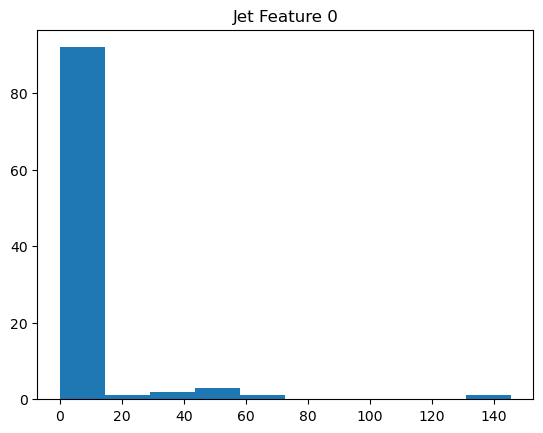

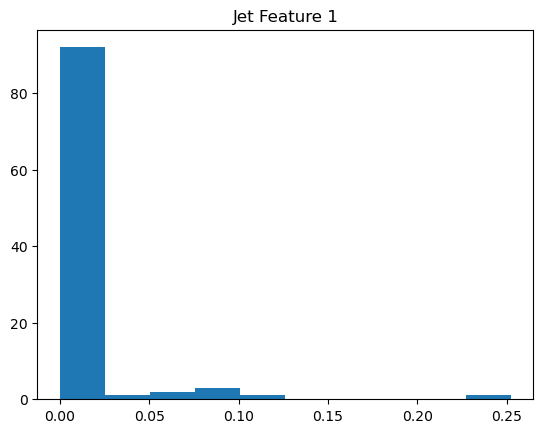

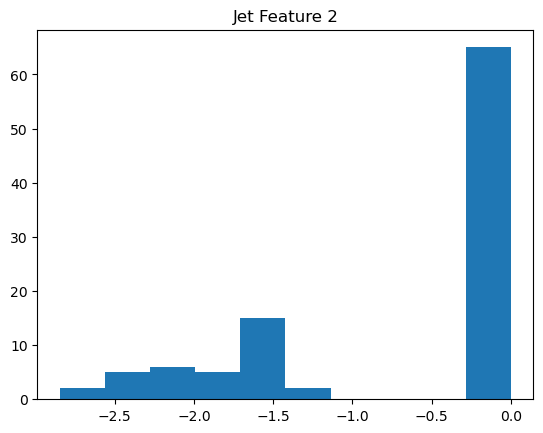

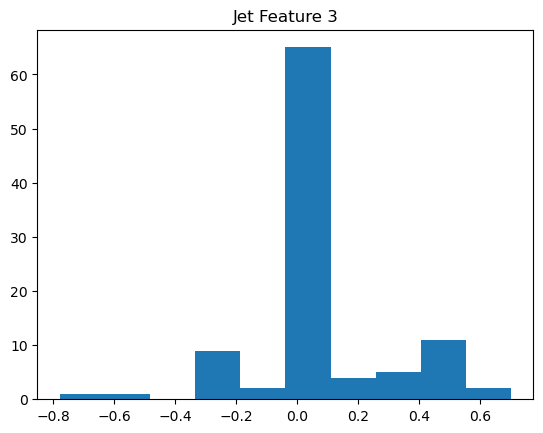

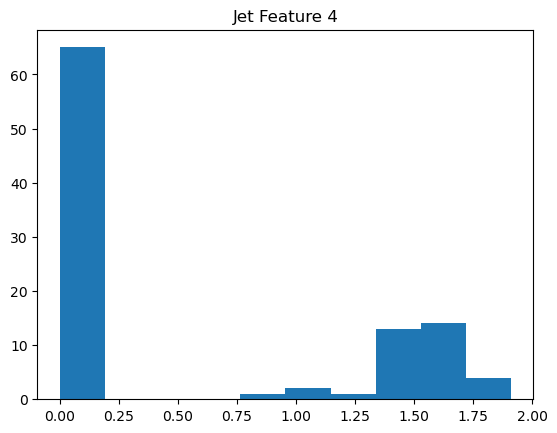

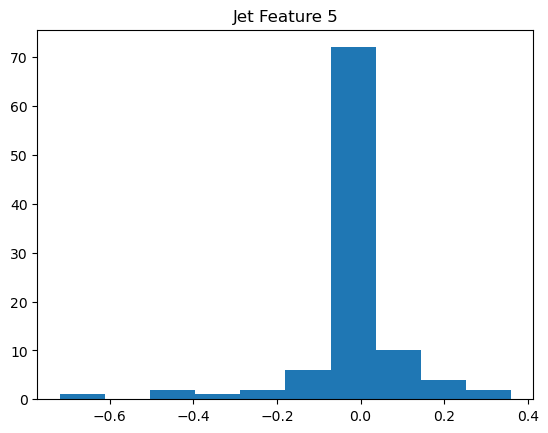

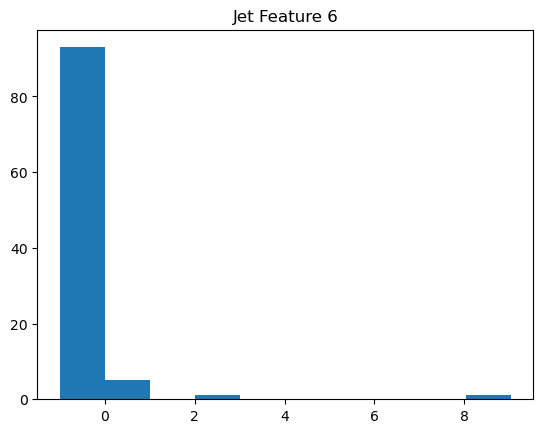

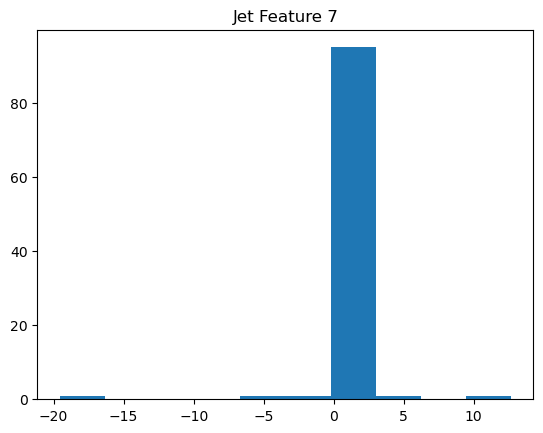

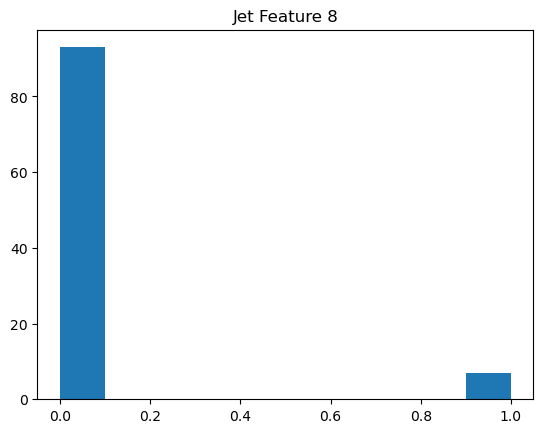

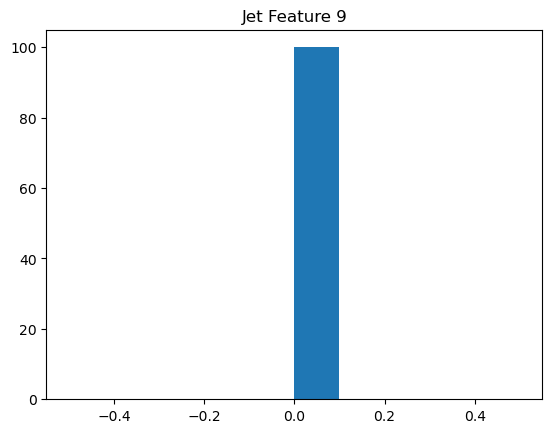

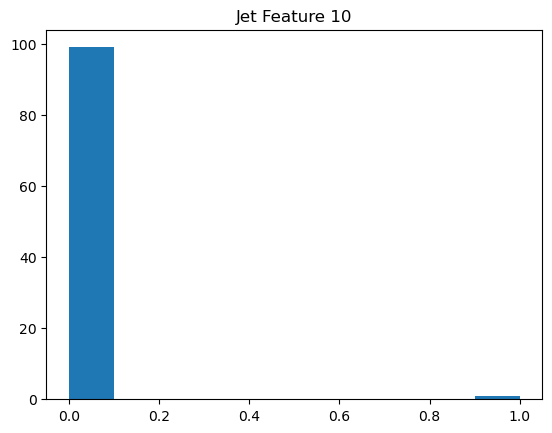

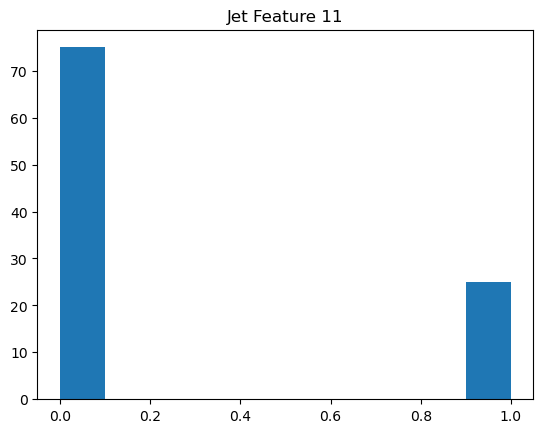

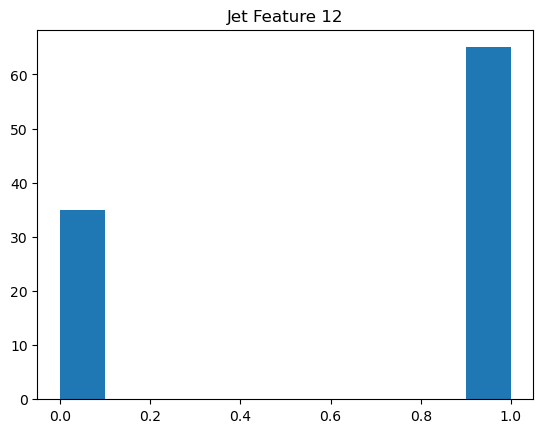

In [39]:
for i in range(ex_jet.shape[1]):
    plt.figure()
    plt.title(f'Jet Feature {i}')
    plt.hist(ex_jet[:,i])
    plt.show()

In [52]:
index = np.random.randint(100)
k = 9
from sklearn.neighbors import NearestNeighbors

  # Number of neighbors to consider
knn = NearestNeighbors(n_neighbors=k)

knn.fit(np.array(ex_jet[:,0:3]))
distances, indices = knn.kneighbors(np.array(torch.unsqueeze(ex_jet[index,0:3],dim=0)))

In [53]:
distances, indices

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[64, 57, 61, 58, 63, 62, 59, 67, 60]]))

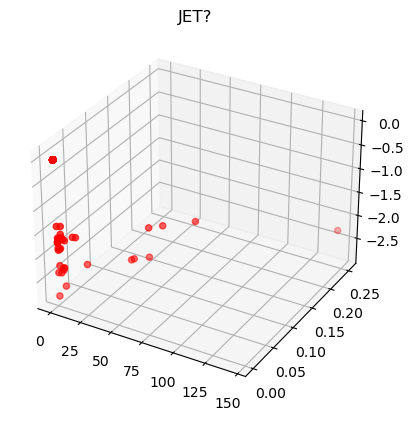

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ex_jet[:,0], ex_jet[:,1], ex_jet[:,2], c='r', marker='o')
plt.title('JET?')
plt.show()